Linear Regression => MSE: 3536148.44, R2: 0.94


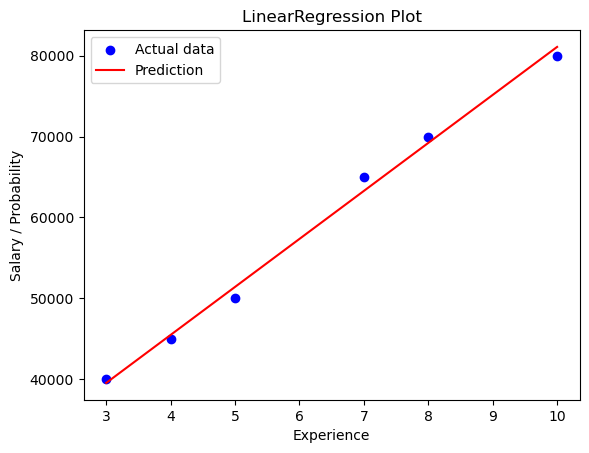

Polynomial Regression => MSE: 2384297.52, R2: 0.96


NotFittedError: Pipeline is not fitted yet.

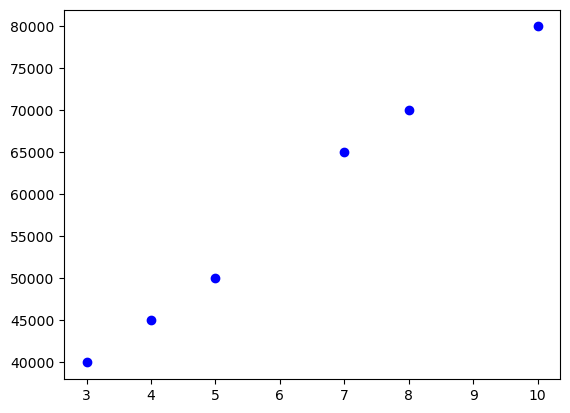

In [37]:
import numpy as np  # Import NumPy for numerical operations
import pandas as pd  # Import pandas for data handling
import matplotlib.pyplot as plt  # For plotting results

# Import machine learning models and utilities
from sklearn.model_selection import train_test_split  # To split dataset
from sklearn.linear_model import LinearRegression, LogisticRegression  # Linear and logistic regression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler  # For polynomial regression and feature scaling
from sklearn.tree import DecisionTreeRegressor  # Decision tree model
from sklearn.ensemble import RandomForestRegressor  # Random forest model
from sklearn.svm import SVR  # Support Vector Regression
from sklearn.neighbors import KNeighborsRegressor  # KNN model
from sklearn.naive_bayes import GaussianNB  # Naive Bayes for classification
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score  # Evaluation metrics
from scipy.optimize import curve_fit  # For non-linear regression (exponential fit)
from sklearn.pipeline import make_pipeline  # To chain transformations and model

# Sample dataset with experience and corresponding salary
data = {'Experience': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'Salary':     [30000, 35000, 40000, 45000, 50000, 60000, 65000, 70000, 75000, 80000]}
df = pd.DataFrame(data)  # Create DataFrame

X = df[['Experience']].values  # Features (2D array)
y = df['Salary'].values  # Target for regression
y_class = (y > y.mean()).astype(int)  # Convert regression target into binary for classification (above mean = 1)

# Split dataset: 60% train, 20% validation, 20% test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
y_class_train, y_class_temp = train_test_split(y_class, test_size=0.4, random_state=42)
y_class_val, y_class_test = train_test_split(y_class_temp, test_size=0.5, random_state=42)

# Function to evaluate model with MSE and R2
def evaluate_model(name, model, X_val, y_val):
    predictions = model.predict(X_val)
    mse = mean_squared_error(y_val, predictions)
    r2 = r2_score(y_val, predictions)
    print(f"{name} => MSE: {mse:.2f}, R2: {r2:.2f}")

# Function to plot model predictions

def plot_model(X, y, model, model_type='regression'):
    plt.scatter(X, y, color='blue', label='Actual data')  # Plot actual data
    X_sorted = np.sort(X, axis=0)  # Sort X for smoother prediction line
    if model_type == 'regression':
        y_pred = model.predict(X_sorted)
        plt.plot(X_sorted, y_pred, color='red', label='Prediction')
    elif model_type == 'classification':
        if hasattr(model, "predict_proba"):
            probs = model.predict_proba(X_sorted)[:, 1]  # Probability of class 1
            plt.plot(X_sorted, probs, color='green', label='Probability')
        else:
            y_pred = model.predict(X_sorted)
            plt.plot(X_sorted, y_pred, color='green', label='Class prediction')
    plt.legend()
    plt.xlabel('Experience')
    plt.ylabel('Salary / Probability')
    plt.title(f'{model.__class__.__name__} Plot')
    plt.show()

# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)  # Train model
evaluate_model("Linear Regression", lin_reg, X_val, y_val)
plot_model(X_train, y_train, lin_reg)

# Polynomial Regression (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_val = poly.transform(X_val)
poly_reg = LinearRegression()
poly_reg.fit(X_poly_train, y_train)
evaluate_model("Polynomial Regression", poly_reg, X_poly_val, y_val)
plot_model(X_train, y_train, make_pipeline(PolynomialFeatures(2), LinearRegression()))

# Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
evaluate_model("Decision Tree", dt, X_val, y_val)
plot_model(X_train, y_train, dt)

# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
evaluate_model("Random Forest", rf, X_val, y_val)
plot_model(X_train, y_train, rf)

# Support Vector Regression with scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
svr = SVR(kernel='rbf')
svr.fit(X_train_scaled, y_train)
evaluate_model("Support Vector Regression", svr, X_val_scaled, y_val)
plot_model(X_train_scaled, y_train, svr)

# K-Nearest Neighbors Regressor
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)
evaluate_model("K-Nearest Neighbors", knn, X_val, y_val)
plot_model(X_train, y_train, knn)

# Logistic Regression (classification: salary > mean)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_class_train)
acc_log = accuracy_score(y_class_val, log_reg.predict(X_val))
print(f"Logistic Regression => Accuracy: {acc_log:.2f}")
plot_model(X_train, y_class_train, log_reg, model_type='classification')

# Gaussian Naive Bayes (classification)
gnb = GaussianNB()
gnb.fit(X_train, y_class_train)
acc = gnb.score(X_val, y_class_val)
print(f"Naive Bayes Classification (Salary > mean) => Accuracy: {acc:.2f}")
plot_model(X_train, y_class_train, gnb, model_type='classification')

# Exponential Non-linear Regression
# Define exponential function
def exp_func(x, a, b):
    return a * np.exp(b * x)

# Fit parameters to exponential curve
params, _ = curve_fit(exp_func, X_train.ravel(), y_train, maxfev=10000)

# Predict and evaluate
y_pred_exp = exp_func(X_val.ravel(), *params)
mse_exp = mean_squared_error(y_val, y_pred_exp)
r2_exp = r2_score(y_val, y_pred_exp)
print(f"Exponential Non-linear Regression => MSE: {mse_exp:.2f}, R2: {r2_exp:.2f}")

# Plot exponential model
X_sorted = np.sort(X_train.ravel())
plt.scatter(X_train, y_train, color='blue', label='Actual data')
plt.plot(X_sorted, exp_func(X_sorted, *params), color='purple', label='Exponential fit')
plt.legend()
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.title('Exponential Regression Plot')
plt.show()
